In [16]:
using JuMP, Ipopt, Printf, Plots
using TestImages, Images, QuartzImageIO, ImageView

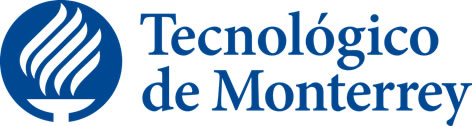

In [20]:
img = load("tec-logo.jpg")

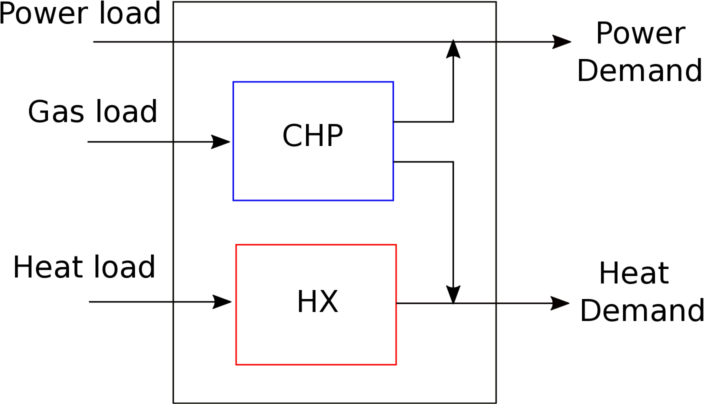

In [19]:
img = load("fig_simple_eh.png")


### Example of a simple Energy Hub

#### Taken from: M. Geidl, G. Andersson, "Optimal Power Flow of Multiple Energy Carriers", IEEE Transctions on Power Systems, Vol.22, No.1, 145-155, February 2007

In [7]:
ae           = 12      ; # Electricity cost coefficient [mu/pu]
ag           = 5       ; # Natural gas cost coefficient [mu/pu]
ah           = 4       ; # Heat cost coefficient        [mu/pu]
be           = 0.12    ; # Electricity cost coefficient [mu/pu^2]
bg           = 0.05    ; # Natural gas cost coefficient [mu/pu^2]
bh           = 0.04    ; # Heat cost coefficient        [mu/pu^2]

eta_ee       = 1       ; # Efficiency conversion e->e   []
eta_ge       = 0.3     ; # Efficiency conversion g->e   []
eta_he       = 0.0     ; # Efficiency conversion h->e   []
eta_eh       = 0       ; # Efficiency conversion e->h   []
eta_gh       = 0.4     ; # Efficiency conversion g->h   []
eta_hh       = 0.9     ; # Efficiency conversion h->h   []

Power_demand = 2       ; # Power demand                 [p.u.]
Heat_demand  = 5       ; # Heat demand                  [p.u.]

In [8]:
simple_EH = Model(solver=IpoptSolver());

In [9]:
@variable(simple_EH, power_load >= 0, start = 1);
@variable(simple_EH, gas_load   >= 0, start = 1);
@variable(simple_EH, heat_load  >= 0, start = 1);

In [10]:
@NLconstraint(simple_EH, c1, eta_ee*power_load + eta_ge*gas_load + eta_he*heat_load == Power_demand);
@NLconstraint(simple_EH, c2, eta_eh*power_load + eta_gh*gas_load + eta_hh*heat_load == Heat_demand );

In [11]:
@NLobjective(simple_EH, Min, ae*power_load+ag*gas_load+ah*heat_load + be*power_load^2+bg*gas_load^2+bh*heat_load^2);

In [13]:
status_simple_EH = solve(simple_EH)

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

:Optimal

In [14]:
println("Objective function value = ", getobjectivevalue(simple_EH))
@printf " Power Load    : %f\n" getvalue(power_load)
@printf " Gas   Load    : %f\n" getvalue(gas_load)
@printf " Heat  Load    : %f\n" getvalue(heat_load)

Objective function value = 46.05398217366303
 Power Load    : 0.429485
 Gas   Load    : 5.235049
 Heat  Load    : 3.228867
